## RLDMUU 2025
#### Beliefs and utility - St Petersburg paradox
jakub.tluczek@unine.ch

In [1]:
import numpy as np

Today we are going to take a look at St Petersburg Paradox. Imagine a game, where you put a wager and coss the coin. If it lands on heads, you win $2^{\text{round}}$, where round is an index of the round starting at 0. If it ever lands on tails, the game is over. An example game would look as follows:

- Round 1: heads, we continue.
- Round 2: heads, we continue.
- Round 3: heads, we continue.
- Round 4: tails, you get back 2^4 = 16 CHF.

The probability of the coin landing $n - 1$ times on heads followed by one tails is $\frac{1}{2^{n}}$, while the winnings in this case would be $2^n$. If we were to use the linear utility $U(x) = x$, then the expected utility $\mathbb{E}\left[ U(x) \right] = \sum_{n=1}^{\infty} \frac{2^n}{2^{n}} = \infty$. 

To make things more realistic, you can also factor in some gamble $k$ and initial capital $C$, which you would be required to pay upfront to pay the game, $\forall_{k,C} \sum_{n=1}^{\infty} \frac{C + 2^n - k}{2^{n}} = \infty$, therefore, according to the utility theory, paradoxically, you would be willing to pay maximum amount of money to enter, for any starting capital.

Fill out the function `st_petersburg_expected_utility` which will give you expected utility for given utility function. You can pass a simple linear utility function and check,  if the utility indeed grows infinitely. The difficulty with calculating the expected utility is that this is an infinite sum. To approximate the infinite sum, you can either:

(a) Truncate it to some fixed stopping time. This will underestimate the expected utility.
(b) Perform the actual experiment many times (throwing a virtual coin, so to speak) and average the results. This will not underestimate the utility, but will be noisy.

In [2]:
def linear_utility(x):
    return x

def st_petersburg_expected_utility(initial_capital, gamble, utility_function, stop = 100):
    reward = lambda x: 2**x
    probability = lambda y: 1 / (2**(y+1))
    utilities = [utility_function(initial_capital + reward(i) - gamble) * probability(i) for i in range(stop)]
    return np.sum(utilities)

Now instead of using linear utility implement following utility functions: 
- $U(x) = \sqrt{x}$ 
- $U(x) = \log(x)$
- $U(x) = \text{crra}(x, \eta)$

Where crra is a constant relative risk aversness function, and is defined as:

$$
\text{crra}(x, \eta) =
\begin{cases}
\frac{x^{1-\eta}}{1-\eta} & \text{if } \eta > 0, \eta \neq 1 \\
\ln x & \text{if } \eta = 1
\end{cases}
$$

In [3]:
def sqrt_utility(x):
    return np.sqrt(float(x))

def log_utility(x):
    if x < 1:
        return 0
    else:
        return np.log(float(x))

def crra_utility(x, eta=0.5):
    if eta == 1:
        return np.log(float(x))
    else:
        return x**(1-eta) / (1-eta)

In [4]:
CAPITAL = 10_000
GAMBLE = 1
UTILITY = log_utility
print(f"Utility of playing:\t{st_petersburg_expected_utility(CAPITAL, GAMBLE, UTILITY)}")
print(f"Utility of not playing:\t{UTILITY(CAPITAL)}")

Utility of playing:	9.211001958792412
Utility of not playing:	9.210340371976184


In [5]:
def maximal_bet(capital, utility_function):
    gambles = np.arange(1,21)
    playing_utilites = [st_petersburg_expected_utility(capital, gamble, utility_function) for gamble in gambles]
    return np.argwhere(playing_utilites > utility_function(capital)).max()


/tmp/ipykernel_11028/1639860090.py:2: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(float(x))


([<matplotlib.axis.XTick at 0x7f90b07cd8a0>,
 [Text(0, 0, '1'),
  Text(1, 0, '5'),
  Text(2, 0, '10'),
  Text(3, 0, '50'),
  Text(4, 0, '100'),
  Text(5, 0, '500'),
  Text(6, 0, '1000'),
  Text(7, 0, '5000'),
  Text(8, 0, '10000'),
  Text(9, 0, '50000'),
  Text(10, 0, '100000'),
  Text(11, 0, '500000'),
  Text(12, 0, '1000000'),
  Text(13, 0, '5000000'),
  Text(14, 0, '10000000'),
  Text(15, 0, '50000000')])

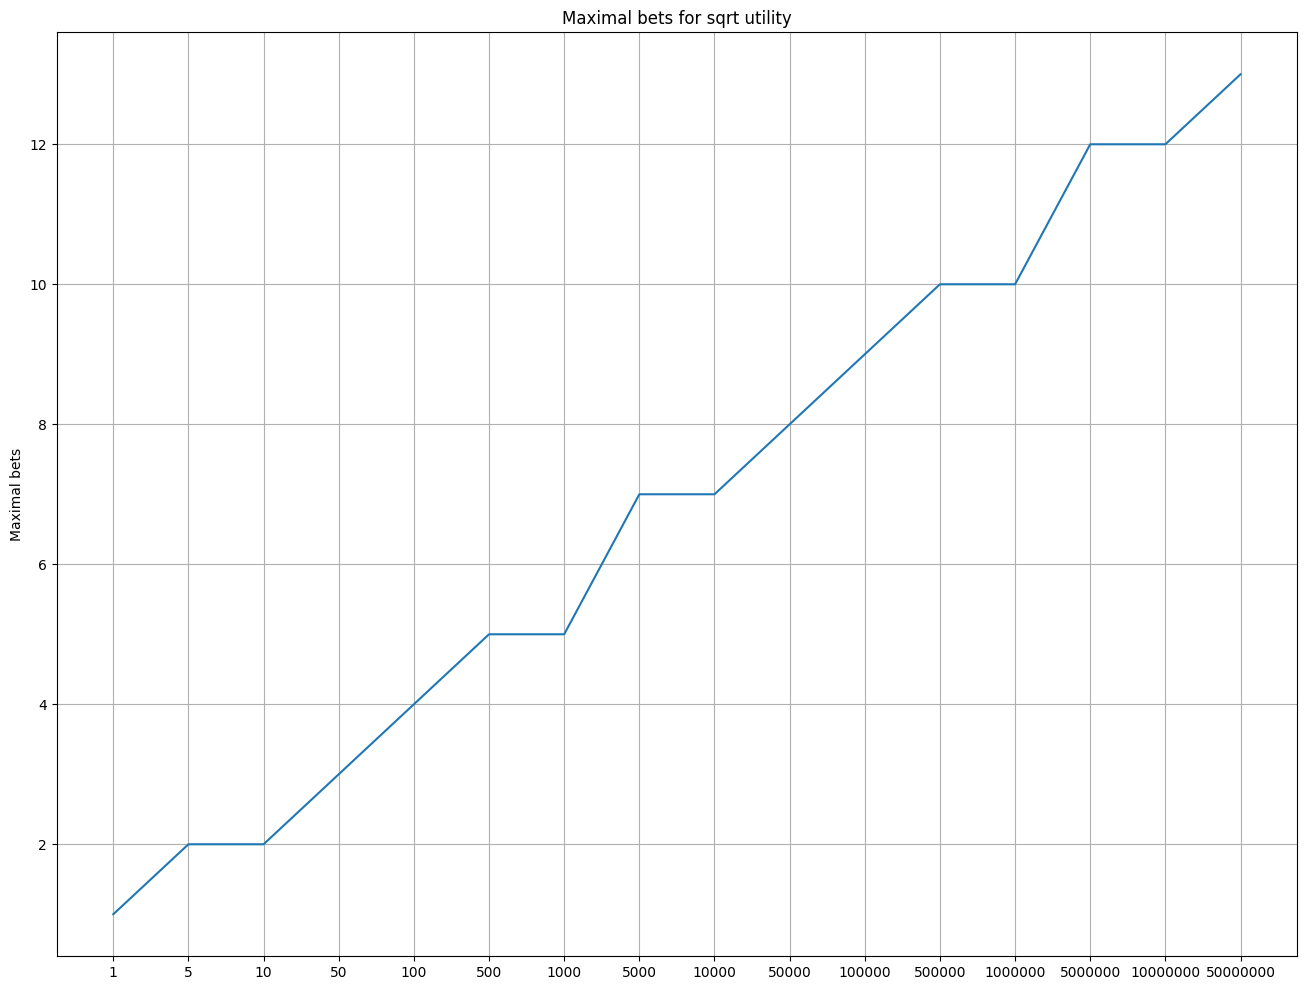

In [6]:
from matplotlib import pyplot as plt 

plt.figure(figsize=(16,12))
xticks = np.array([[10**i, 5 * 10**i] for i in range(8)]).flatten()
max_bets = [maximal_bet(capital, sqrt_utility) for capital in xticks]
plt.plot(max_bets)
plt.grid()
plt.title("Maximal bets for sqrt utility")
plt.ylabel("Maximal bets")
plt.xticks(np.arange(len(xticks)), xticks)


Using above utilities and `st_petersburg_expected_utility` check, what are the maximum bets $k$ given different capitals $C$, at which it would make sense to enter the game. You can use `pyplot` to plot the maximum bets for different capitals. 